In [36]:
import time
t = time.time()

#Import training data and labels from the other python file
from dataset import data, label

# Count elapsed time and print it
elapsed = time.time() - t
print("Time taken for data import from dataset.py(in sec):"+str(elapsed))

#importing modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import optimizers, metrics
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np



# Count elapsed time for import and print it
elapsed = time.time() - t
print("Time taken for data/modules import(in sec):"+str(elapsed))

Time taken for data import from dataset.py(in sec):6.604194641113281e-05
Time taken for data/modules import(in sec):0.00044989585876464844


In [37]:
#input data shape for input_shape argument.

data_shape=data.shape[1] 

In [38]:
#CNN network

model = Sequential()
model.add(Conv1D(filters= 32, kernel_size = 5, input_shape=(data_shape,1)))
model.add(MaxPooling1D(pool_size=2,strides=2))

#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

#model.add(Activation("relu"))

In [39]:
#Optimizers

sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

In [40]:
#Configures the model for training

model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

In [41]:
#Data Splitting: Train, test

X_Train, X_test, y_Train, y_test = train_test_split(data, label, test_size=0.1, random_state=0)

In [42]:
# Train to train, CV

X_train, X_CV, y_train, y_CV = train_test_split(X_Train, y_Train, test_size=0.1, random_state=0)

In [43]:
#Training : Trains the model for a given number of epochs (iterations on a dataset)

model.fit(X_train, y_train, batch_size=64, epochs=1)

Epoch 1/1
4860/4860 [==============================] - 14s 3ms/step - loss: 0.2664 - acc: 0.4977


In [44]:
#evaluate: Returns the loss value & metrics values(accuracy) for the model in test mode.

score = model.evaluate(X_CV, y_CV, batch_size=10)
print("Evaluation score is ", score)

540/540 [==============================] - 1s 2ms/step
Evaluation score is  [0.2506730462665911, 0.4981481576407397]


In [45]:
#Generates output predictions for the input samples

predictions = model.predict(X_test, batch_size=None, verbose=0)
print("Output predictions")
score = model.evaluate(X_test, y_test, batch_size=10)
print("Evaluation score is ", score)

Output predictions
600/600 [==============================] - 1s 1ms/step
Evaluation score is  [0.24968125348289807, 0.5200000042716663]


In [66]:
#predictions, y_test

v = np.empty([600, 2]) 
v[:,0] = predictions[:,0]
v[:,1]= y_test[:] 

In [65]:
#save the value to a text file

np.savetxt("a.txt",v,fmt='%4f')

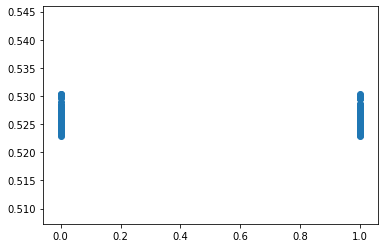

In [64]:
#Plot of y_test vs predictions
from matplotlib import pyplot as plt

## The line / model
plt.scatter(y_test, predictions)
#plt.xlabel(“Values”)
#plt.ylabel(“Predictions”)

In [60]:
# Print the predictions vs y_test value

print(v)

[[0.52650523 0.        ]
 [0.52386278 1.        ]
 [0.52581269 0.        ]
 ...
 [0.52479088 0.        ]
 [0.52740204 1.        ]
 [0.52456433 0.        ]]


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

NameError: name 'svm' is not defined